In [527]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [528]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

In [529]:
from helper import *

In [530]:
plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

## Graphs

A graph is defined as:
$$ \mathcal{G} = \{ \mathcal{V}, \mathcal{E}, W \} $$

* $\mathcal{V}$: set of vertices with $|\mathcal{V}|=N$
* $\mathcal{E}$: set of edges with an edge $e = (i,j)$ connecting vertices $i$ and $j$
* $W$: weighted adjacency matrix with $W_{i,j}$ edge weight for an edge, o.w. it's equal to $0$

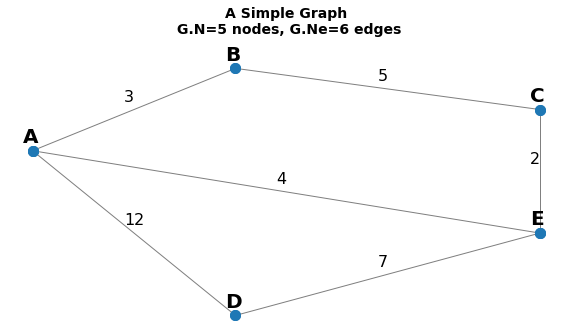

V - set of vertices :
['A', 'B', 'C', 'D', 'E'] 

E - set of edges : 
[(0, 1), (0, 3), (0, 4), (1, 0), (1, 2), (2, 1), (2, 4), (3, 0), (3, 4), (4, 0), (4, 2), (4, 3)] 

W - weighted adjacency matrix :
[[ 0  3  0 12  4]
 [ 3  0  5  0  0]
 [ 0  5  0  0  2]
 [12  0  0  0  7]
 [ 4  0  2  7  0]] 



In [412]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)
myGraphPlot(G,  
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph",
            display_vertexnames = True,
            display_edgeweights = True,
            print_graph_info=True)

### Graph Construction Methods

* Gaussian Kernel Weighting function
$$
    W_{i,j} = \begin{cases}
        \exp (-\frac{[dist(i,j)]^2}{2\theta^2}), & \text{if} \: dist(i,j)\leq \mathcal{K} \\
        0, & \text{o.w.}
    \end{cases}
$$

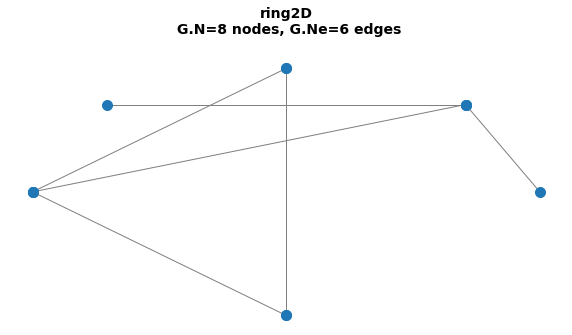

In [251]:
N = 8
K = 0.93
rs = np.random.RandomState(42)
W = rs.uniform(size=(N,N))
W[W < K] = 0
W = W + W.T
np.fill_diagonal(W, 0)
G = graphs.Graph(W)
myGraphPlot(G, print_graph_info=False)

* Edges from K-Nearest Neighbors method

In [252]:
places = [
    [2,3],
    [32,2],
    [33,1],
    [2,54],
    [32,32],
    [12,34]
]
for i in places:
    print(i)
    #plt.text(i[0], i[1], "Hey")
    
plt.show()
print("\n---TODO: to be implemented later---")

[2, 3]
[32, 2]
[33, 1]
[2, 54]
[32, 32]
[12, 34]

---TODO: to be implemented later---


### Graph Examples

2023-02-28 17:34:05,714:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.8284271247461903
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


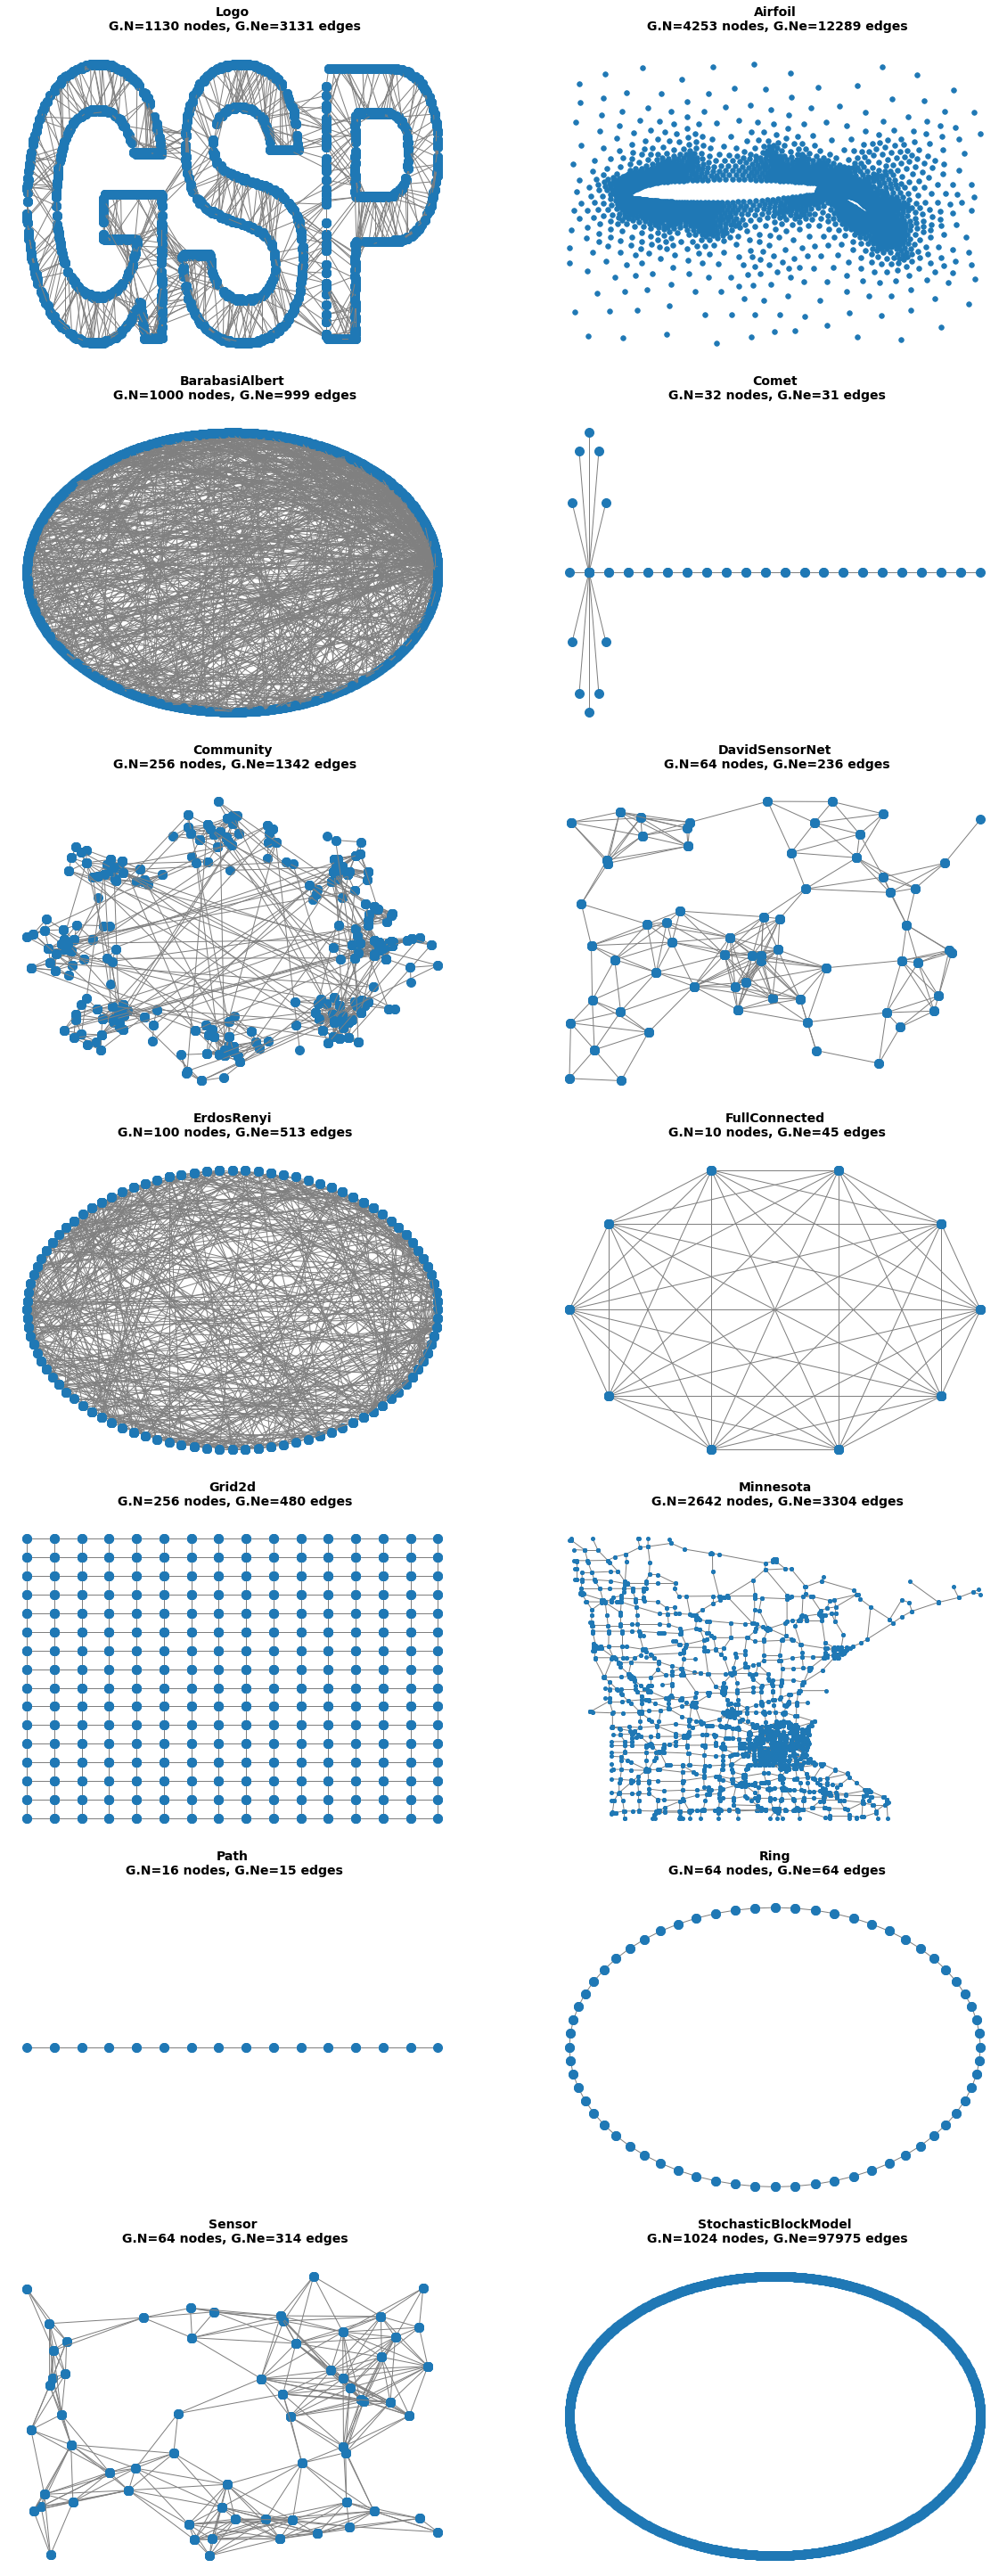

In [282]:
Gs = [graphs.Logo(),
      graphs.Airfoil(),
      graphs.BarabasiAlbert(),
      graphs.Comet(),
      graphs.Community(),
      graphs.DavidSensorNet(),
      graphs.ErdosRenyi(),
      graphs.FullConnected(),
      graphs.Grid2d(),
      graphs.Minnesota(),
      graphs.Path(),
      graphs.Ring(),
      graphs.Sensor(),
      graphs.StochasticBlockModel(),
      graphs.SwissRoll(),
      graphs.Torus()
    ]

Gtitles = ["Logo",
           "Airfoil",
           "BarabasiAlbert",
           "Comet",
           "Community",
           "DavidSensorNet",
           "ErdosRenyi",
           "FullConnected",
           "Grid2d",
           "Minnesota",
           "Path",
           "Ring",
           "Sensor",
           "StochasticBlockModel",
           "SwissRoll",
           "Torus"
          ]

fig, axes = plt.subplots(7,2, figsize=(20,52))

for i in range(7):
    for j in range(2):
        myGraphPlot(Gs[i*2+j],  
                    title = Gtitles[i*2+j], 
                    ax=axes[i,j])
plt.show()

## Graph Signals

$$
\mathcal{G} = \{ \mathcal{V}, \mathcal{E}, W \}
$$
with 
$$
f : \mathcal{V} \rightarrow \mathbb{R}
$$
Then,
$$
\textbf{f} \in \mathbb{R}^N
$$
with $|\mathcal{V}| = N$, i.e. number of vertices in the graph $\mathcal{G}$.

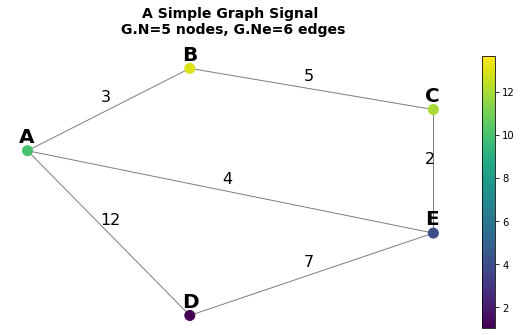

In [315]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)
myGraphPlotSignal(G, 
            s = np.array([10,13,12,1,4]),
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph Signal",
            display_vertexnames = True,
            display_edgeweights = True)

## Graph Laplacian

$$
Ł : \mathbb{R}^N \rightarrow \mathbb{R}^N
$$
<br>
$$
(Łf)(i) = \sum_{j \in \mathcal{N}_i} W_{i,j} [f(i)-f(j)]
$$
where $\mathcal{N}_i$ is the set of vertices connected to vertex $i$ by an edge

<br>
This operator can be represented by a matrix:
$$
Ł = D - W
$$
where $D$ is a degree matrix which is a diagonal element whose $i^{th}$ is $d_i = \sum_{j=1}^{N}$

$$
L_{i,j} = \begin{cases}
d_i, & \text{if } \: i=j \\
-W_{i,j} & \text{if $i\neq j$ and $v_i$ adjacent to $v_j$} \\
0, & \text{o.w.}
\end{cases}
$$

So, $Ł$ is a real symmetric matrix. It has a complete set of orthonormal eigenvectors: $\{u_l\}_{l=0,1,...,N-1}$

$$
Łu_l = \lambda_l u_l
$$
Also, the corresponding set of eigenvalues is $\{\lambda_l\}_{l=0,1,...,N-1}$. Assume it's ordered from $0=\lambda_0$ to $\lambda_{N-1}=\lambda_{max}$. Then, the eigendecomposition can be written as follows:

$$
Ł = U \Lambda U^T
$$
where $\Lambda = \text{diag}(\lambda_0,...,\lambda_{N-1})$.

**Note:** Graph Laplacian is a difference operator.

## Graph Fourier Transform

Graph Fourier transform is defined as:

$$
\hat{f}(\lambda_l) = < f, u_l > = \sum_{i \in \mathcal{V}} f(i) u^*_l(i)
$$

Inverse graph Fourier transform is defined as:
$$
f(i) = \sum_{l=0}^{N-1} \hat{f}(\lambda_l) u_{l}(i)
$$

These two transforms can be represented by matrices $U^T$ and $U$, respectively, where the columns of $U$ are eigenvectors of graph Laplacian operators, $\{u_l(i)\}_{i\in \mathcal{V}}$.

**Note:**
* Graph Laplacian eigenvectors and eigenvectors provide a notion of frequency.
    * Eigenvectors associated to higher eigenvalues oscillate more rapidly

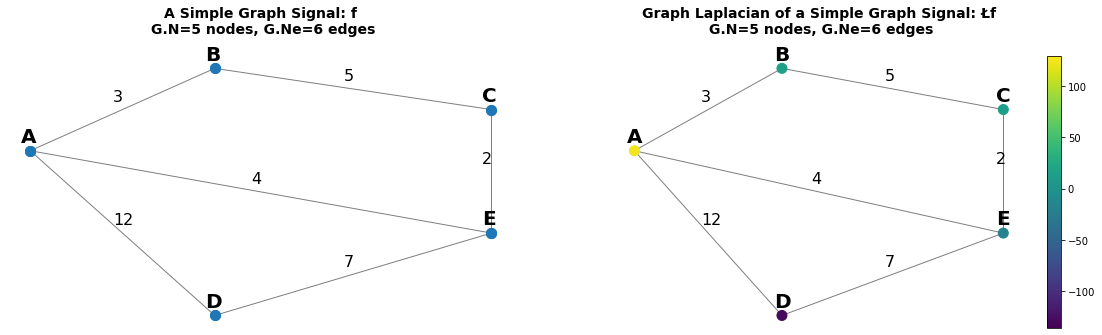

Ordered eigenvector give Fourier basis:  True 

First eigenvector corresponding: v_0 =  [0.4472136 0.4472136 0.4472136 0.4472136 0.4472136] , where 1/sqrt(5) = 0.4472135954999579 
	It also corresponds to eigenvalue lambda_0= -1.894401462684982e-16 

Proof of Orthonormality of Fourier basis:
	<u_0,u_0> = 1	
	<u_1,u_0> = 0	<u_1,u_1> = 1	
	<u_2,u_0> = 0	<u_2,u_1> = 0	<u_2,u_2> = 1	
	<u_3,u_0> = 0	<u_3,u_1> = 0	<u_3,u_2> = 0	<u_3,u_3> = 1	
	<u_4,u_0> = 0	<u_4,u_1> = 0	<u_4,u_2> = 0	<u_4,u_3> = 0	<u_4,u_4> = 1	


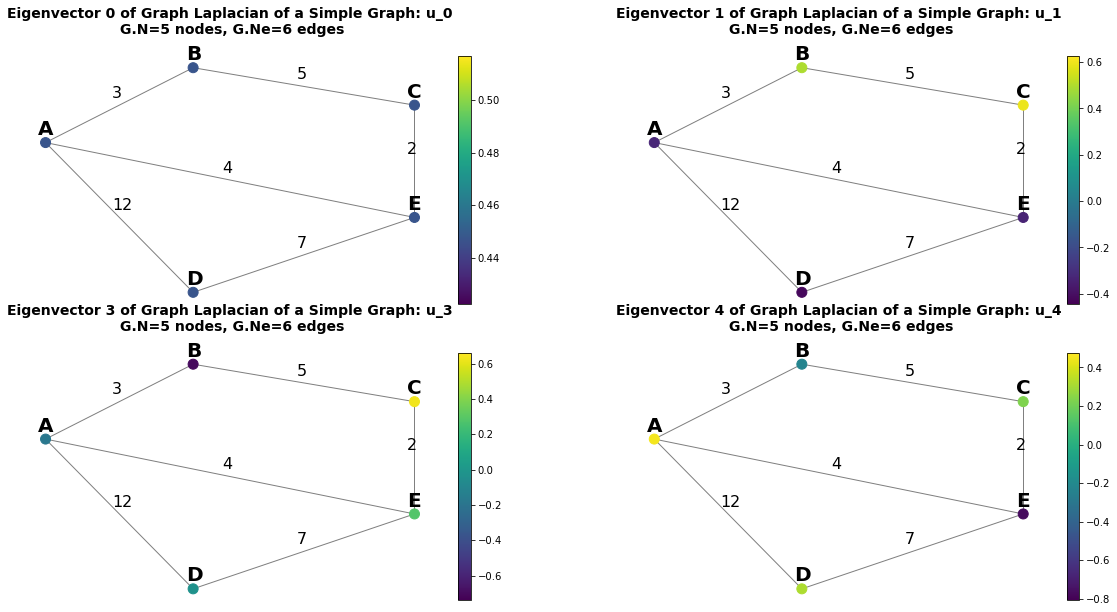

In [354]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)

G.compute_laplacian()
G.compute_fourier_basis()

L = G.L.toarray()
s = np.array([10,13,12,1,4])

L_s = L @ s

fig, axes = plt.subplots(1,2, figsize=(20,5))

myGraphPlot(G,  
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph Signal: f",
            display_vertexnames = True,
            display_edgeweights = True,
            ax=axes[0])

myGraphPlotSignal(G, 
            s = L_s,
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "Graph Laplacian of a Simple Graph Signal: Łf",
            display_vertexnames = True,
            display_edgeweights = True,
            ax=axes[1])
plt.show()

Lamb, U = np.linalg.eig(L)
sort_inds = np.argsort(Lamb)
Lamb = Lamb[sort_inds]
U = U[:,sort_inds]
print("Set of ordered eigenvectors gives Fourier basis: ", (np.abs(U-G.U)<1e-15).all(), "\n")
print("First eigenvector corresponding: v_0 = ", U[:,0], ", where 1/sqrt(5) =", 1/np.sqrt(5), "\n\tIt also corresponds to eigenvalue lambda_0=", Lamb[0], "\n")

print("Proof of Orthonormality of Fourier basis:")
for i in range(5):
    print("\t", end="")
    for j in range(i+1):
        res = np.inner(U[:,i], U[:,j])
        if np.abs(res)< 1e-15:
            res = 0
        elif np.abs(res-1)<1e-15:
            res = 1
        print("<u_" + str(i) + ",u_" + str(j) + "> =", res, end="\t")
    print()
    
show_inds = [0,1,3,4]

fig, axes = plt.subplots(2,2, figsize=(20,10))
for i in range(2):
    for j in range(2):
        myGraphPlotSignal(G, 
                    s = G.U[:,i*2+j],
                    coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
                    vertex_names=["A", "B", "C", "D", "E"],
                    title = "Eigenvector " + str(show_inds[i*2+j]) + " of Graph Laplacian of a Simple Graph: u_" + str(show_inds[i*2+j]),
                    display_vertexnames = True,
                    display_edgeweights = True,
                    ax=axes[i,j])
plt.show()


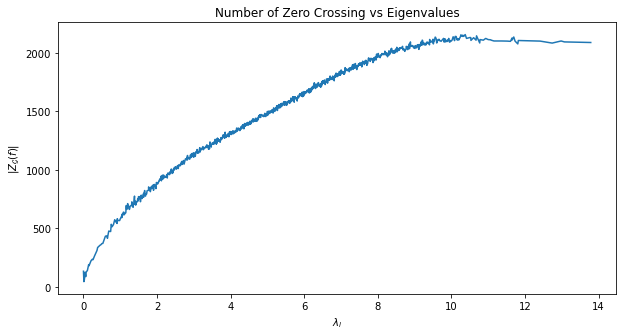

In [400]:
G = graphs.Logo()

G.compute_laplacian()
G.compute_fourier_basis()

U = G.U - np.mean(G.U, axis=0)
L = G.L.toarray()

W = G.W.toarray()
inds = np.where(W!=0)
inds = list(zip(inds[0], inds[1]))
for cord in inds:
    try:
        inds.remove((cord[1], cord[0]))
    except:
        pass

def zero_crossings(s, inds):
    res = 0
    for cord in inds:
        if (s[cord[0]]*s[cord[1]] < 0):
            res += 1
    return res

zc_s = []
for i in range(G.N):
    zc_s.append(zero_crossings(U[:,i], inds))

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(G.e, zc_s)
ax.set_ylabel("$|Z_{\mathcal{G}}(f)|$")
ax.set_xlabel("$\lambda_l$")
ax.set_title("Number of Zero Crossing vs Eigenvalues")
plt.show()

## Heat Kernel

$$
\hat{g}(\lambda_l) = e^{-5\lambda_l}
$$
Then, inverse Fourier transform is applied to obtain the graph signal, $g(i)$:
$$
g(i) = \sum_{\lambda = 0}^{N-1} \hat{g}(\lambda_l) u_l(i)
$$

The signals that can be represented in vertex ($g$) and graph spectral domain ($\hat{g}$) are called **kernels**.

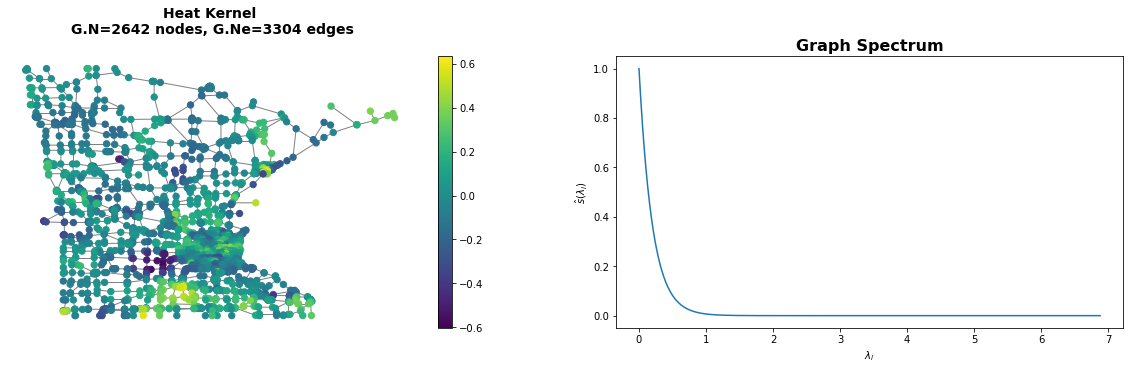

In [410]:
G = graphs.Minnesota()
G.compute_laplacian()
G.compute_fourier_basis()

s_hat = np.exp(-5*G.e)

s = G.igft(s_hat)

fig, axes = plt.subplots(1,2,figsize=(20,5))
myGraphPlotSignal(G, 
            s = s,
            title = "Heat Kernel",
            ax=axes[0])
axes[1].plot(G.e, s_hat)
axes[1].set_title("Graph Spectrum", fontsize=16, fontweight=600)
axes[1].set_xlabel("$\lambda_l$")
axes[1].set_ylabel("$\hat{s}(\lambda_l)$")
plt.show()


## Graph Signal Smoothness

* Edge derivative of $f$ with respect to edge $e=(i,j)$ at vertex $i$:

$$
\left. \frac{\partial f}{\partial e} \right\vert_i = \sqrt{W_{i,j}} [f(j)-f(i)]
$$

* Graph gradient of $f$ at vertex $i$:

$$
\nabla_i f = 
\begin{bmatrix}
\{ \frac{\partial f}{\partial e} \}_{e \in \mathcal{E} \text{ s.t. $e=(i,j)$ for some $j \in \mathcal{V}$}} 
\end{bmatrix}
$$

* **Local variation** of $f$ at vertex $i$:

$$
|| \nabla_i f ||_2 = \begin{bmatrix}
\sum_{e \in \mathcal{E} \text{ s.t. $e=(i,j)$ for some $j \in \mathcal{V}$}} (\left. \frac{\partial f}{\partial e} \right\vert_i)^2
\end{bmatrix}^{\frac{1}{2}}
$$

$$
|| \nabla_i f ||_2 = \begin{bmatrix}
\sum_{j \in \mathcal{N}_i} W_{i,j} [f(j) - f(i)]^2
\end{bmatrix}^{\frac{1}{2}}
$$

* Discrete p-Dirichlet form of $f$:

$$
S_p(f) = \frac{1}{p} \sum_{i \in \mathcal{V}} || \nabla_i f ||^p_2 = \frac{1}{p} \sum_{i \in \mathcal{V}} [\sum_{j \in \mathcal{N}_i} W_{i,j} [f(j)-f(i)]^2]^{\frac{p}{2}}
$$
This is for **global smoothness**.

   * $p=1$: total variation of the signal wrt graph
   * $p=2$:
   
$$
S_2(f) = \sum_{(i,j) \in \mathcal{E}} W_{i,j} [f(j) - f(i)]^2 = \textbf{f}^T Ł \textbf{f}
$$

**Note:** We can also define semi norm:
$$
||\textbf{f}||_Ł = ||Ł^{\frac{1}{2}} \textbf{f}||_2 = \sqrt{\textbf{f}^T Ł \textbf{f}} = \sqrt{S_2(f)}
$$

So, 

* $S_2(f)=0$ iff $f$ is constant across all vertices.

* $S_2(f)$ is small when the signal $f$ has similar values at neighboring vertices connected by an edge with a large weight, i.e. when it's smooth.

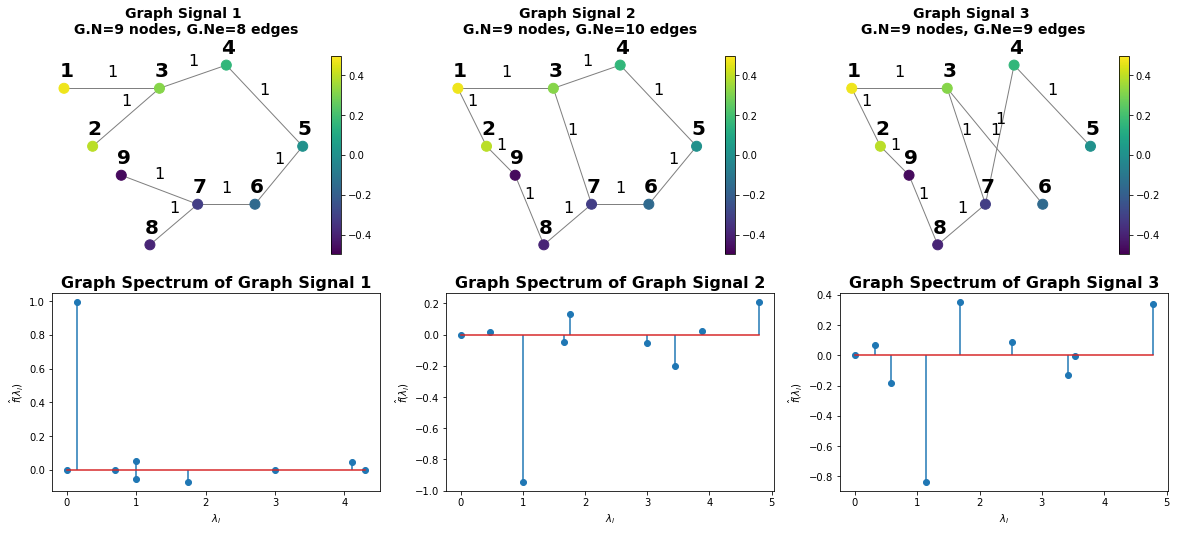

f^T L_1 f =  0.16049382716049385
f^T L_2 f =  1.2839506172839505
f^T L_3 f =  1.6543209876543208
=> Even thouugh we have the same signal values and same vertices, the difference on edges can affect the smoothness
	Here, G1 is the smoothest signal


In [490]:
coords = [
    [0,5],
    [0.6,4],
    [2,5],
    [3.4,5.4],
    [5,4],
    [4,3],
    [2.8,3],
    [1.8,2.3],
    [1.2,3.5]
]
s = np.array([6,5,4,2,0,-2,-4,-5,-6])
s = s / np.sum(s**2)**(0.5)

W1 = np.array([
    [0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,1,0,1,1],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0]
])
W2 = np.array([
    [0,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,1],
    [1,0,0,1,0,0,1,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,1,0,0,1,0,1,0],
    [0,0,0,0,0,0,1,0,1],
    [0,1,0,0,0,0,0,1,0]
])
W3 = np.array([
    [0,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,1,1,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,1,0],
    [0,0,0,0,0,0,1,0,1],
    [0,1,0,0,0,0,0,1,0]
])


GS = [graphs.Graph(W1), graphs.Graph(W2), graphs.Graph(W3)]
fig, axes = plt.subplots(2,3, figsize=(20,8))
s2s = []
for i in range(3):
    G = GS[i]
    G.compute_laplacian()
    G.compute_fourier_basis()
    myGraphPlotSignal(G,
                s=s,
                coords = coords,
                title = "Graph Signal " + str(i+1),
                display_vertexnames = True,
                display_edgeweights = True,
                ax=axes[0,i])
    
    s_hat = G.gft(s)
    axes[1,i].stem(G.e, s_hat)
    axes[1,i].set_xlabel("$\lambda_l$")
    axes[1,i].set_ylabel("$\hat{f}(\lambda_l)$")
    axes[1,i].set_title("Graph Spectrum of Graph Signal " + str(i+1), fontsize=16, fontweight=600)
    
    L = G.L.toarray()
    s2 = s.transpose() @ (L @ s)
    s2s.append(s2)
    
plt.show()

for i in range(3):
    print("f^T L_" + str(i+1) + " f = ", s2s[i], end="\n")
    
print("=> Even thouugh we have the same signal values and same vertices, the difference on edges can affect the smoothness")
print("\tHere, G1 is the smoothest signal")

# Generalized Operators for Graph Signals

## Filtering

1. **Frequency filtering**

$$
\hat{f}_{out}(\lambda_l) = \hat{f}_{in}(\lambda_l) \hat{h}(\lambda_l)
$$
$$
\longleftrightarrow
$$
$$
f_{out}(i) = \sum_{l=0}^{N-1} \hat{f}_{in} (\lambda_l) \hat{h}(\lambda_l) u_l(i)
$$

This multiplication property in graph spectral domain results in the following equation:

$$
f_{out} = \hat{h}(Ł) f_{in}
$$
where 
$$
\hat{h}(Ł) = U \begin{bmatrix}
\hat{h}(\lambda_0) & ... & 0 \\
... & ... & ... \\
0 & ... & \hat{h}(\lambda_{N-1})
\end{bmatrix} U^T
$$

The basic graph spectral filtering can be used to implement discrete versions of well-known continuous filtering techniques. In particular, many of these filters arise as solutions to variational problems to regularize ill-posed inverse problems such as denoising, inpainting and super-resolution. One example is the discrete regularization framework

$$
    \min_{\textbf{f}} \{ ||\textbf{f}-\textbf{y}||_2^2 + \gamma S_p(\textbf{f})\}
$$

**Example - Tikhonov Regularization:**

We observe a noisy graph signal $\textbf{y}=\textbf{f}_0+\eta$, where $\eta$ is uncorrelated additive Gaussian noise and we wish to recover $\textbf{f}_0$. To enforce a priori information that $\textbf{f}_0$ is smooth, we include a regularization form $\textbf{f}^T Ł \textbf{f}$:

$$
    \min_{\textbf{f}} \{ ||\textbf{f}-\textbf{y}||_2^2 + \gamma \textbf{f}^T Ł \textbf{f}\}
$$

The first-order optimality conditions of the convex objective function show that the optimal reconstruction is given by
$$
f_* (i) = \sum^{N-1}_{l=0} \begin{bmatrix} \frac{1}{1 + \gamma \lambda_l} \end{bmatrix} \hat{y}(\lambda_l) u_l(i)
$$
or, equivalently, $\textbf{f} = \hat{h}(Ł) \textbf{y}$, where $\hat{h}(\lambda) = \frac{1}{1+ \gamma \lambda}$ can be viewed as a low-pass filter.

* **Whole method:**

The experiment is done ony 512x512 cameraman image and corrupt it with additive Gaussian noise with mean zero, 0.1 std to get a noisy signal. 
Form a semi-local graph on the pixels by connecting each pixel to its horizontal, vertical and diagonal neighbors and setting the Gaussian weights edges of the semi-local graph are independent of the noisy image, but the distances are the differences between the neighboring pixel values in the noisy image. Take $\theta = 0.1$ and $\mathcal{K}=0$ for Gaussian graph construction. Then perform low-pass graph filtering with $\gamma = 10$ to reconstruct the image. 

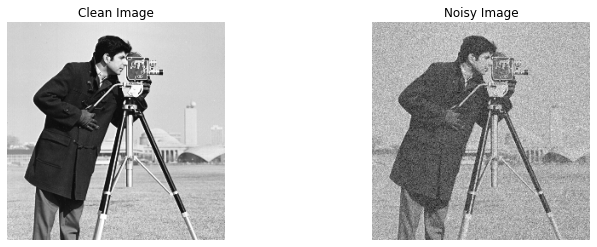

In [535]:
f = plt.imread("cman.tif") / 255.0

rs = np.random.RandomState(5)
n = rs.randn(f.shape[0], f.shape[1])*0.1
y = f + n

fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].imshow(f, cmap="gray")
axes[1].imshow(y, cmap="gray")
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[0].set_title("Clean Image")
axes[1].set_title("Noisy Image")
plt.show()

Theta = 0.1
K = 0

def gaussian_weight(dist, K, theta):
    #if (dist <= K):
    return np.exp(-(dist**2)/(2*(Theta**2)))
    #else:
    #    0

W = np.zeros((f.shape[0]*f.shape[1], f.shape[0]*f.shape[1]))
N = f.shape[1]
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        k = j*N+i
        if (j>1):
            res = gaussian_weight(0,K,Theta) if (f[i,j]==f[i,j-1]) else 0
            #dist = np.abs(f[i,j]-f[i,j-1])
            #res = gaussian_weight(dist,K,Theta)
            W[k-N,k] = res
            W[k,k-N] = res
        if (j<N-1):
            res = gaussian_weight(0,K,Theta) if (f[i,j]==f[i,j+1]) else 0
            #dist = np.abs(f[i,j]-f[i,j+1])
            #res = gaussian_weight(dist,K,Theta)
            W[k+N,k] = res
            W[k,k+N] = res
        if (i>1):
            res = gaussian_weight(0,K,Theta) if (f[i,j]==f[i-1,j]) else 0
            #dist = np.abs(f[i,j]-f[i-1,j])
            #res = gaussian_weight(dist,K,Theta)
            W[k-1,k] = res
            W[k,k-1] = res
        if (i<N-1):
            res = gaussian_weight(0,K,Theta) if (f[i,j]==f[i+1,j]) else 0
            #dist = np.abs(f[i,j]-f[i+1,j])
            #res = gaussian_weight(dist,K,Theta)
            W[k+1,k] = res
            W[k,k+1] = res


G = graphs.Graph(W)



In [522]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
inds = [0,2]
a[inds,0] = 1
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 1 10 11 12]]


In [ ]:
N = 8
K = 0.93
rs = np.random.RandomState(42)
W = rs.uniform(size=(N,N))
W[W < K] = 0
W = W + W.T
np.fill_diagonal(W, 0)
G = graphs.Graph(W)
myGraphPlot(G, print_graph_info=False)

In [235]:
G = graphs.Logo()
G.estimate_lmax()
g = filters.Heat(G, tau=100)

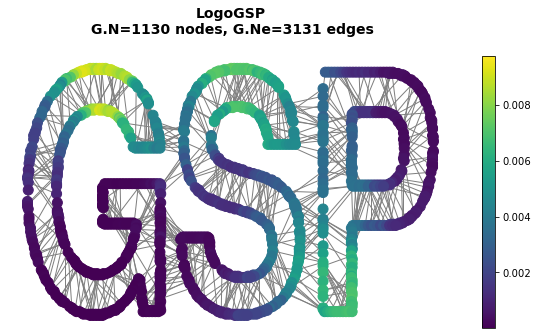

In [236]:
DELTAS = [20, 30, 1090]
s = np.zeros(G.N)
s[DELTAS] = 1
s = g.filter(s)
myGraphPlotSignal(G, s, 
                  title="LogoGSP")

## Finite-Length DT Signal

In [96]:
W = np.zeros((10,10))
for i in range(9):
    W[i,i+1] = 1
    W[i+1,i] = 1

G1 = graphs.Graph(W)

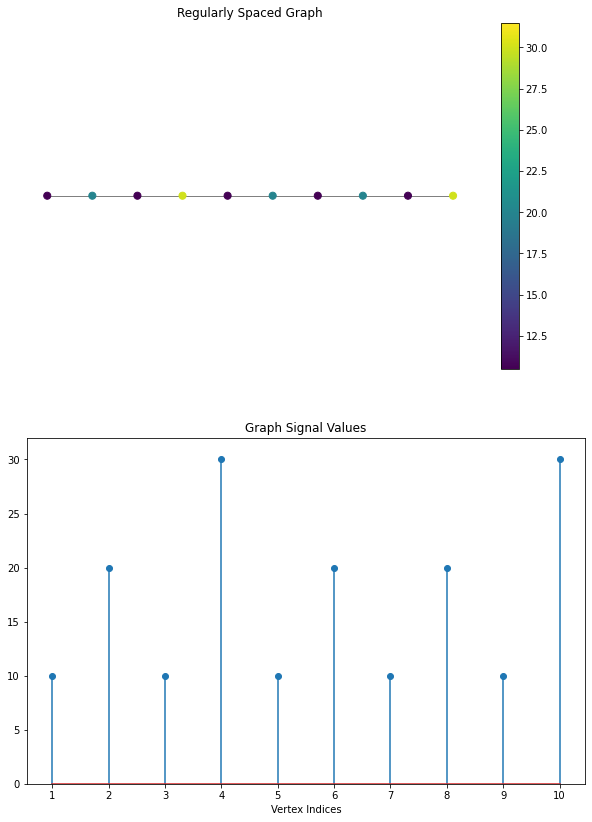

In [97]:
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
G1.set_coordinates(np.array([
    [0,0],
    [1,0],
    [2,0],
    [3,0],
    [4,0],
    [5,0],
    [6,0],
    [7,0],
    [8,0],
    [9,0],
]))
f = np.array([10,20,10,30,10,20,10,20,10,30])
G1.plot_signal(f, ax=axes[0], vertex_size=50)
_ = axes[0].set_title("Regularly Spaced Graph")
axes[0].set_axis_off()
axes[1].stem(np.arange(1, 11, 1), f)
axes[1].set_xticks(np.arange(1, 11, 1))
axes[1].set_ylim([0,32])
axes[1].set_xlabel("Vertex Indices")
axes[1].set_title("Graph Signal Values")
plt.savefig("GraphSP/fig/regspaced_exp.png")
plt.show()

## Petersen Graph

In [100]:
W = np.array([
    [0,1,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,1,0,0,0,0],
    [0,1,0,1,0,0,1,0,0,0],
    [0,0,1,0,1,0,0,1,0,0],
    [1,0,0,1,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,1,1,0],
    [0,0,1,0,0,0,0,0,1,1],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,1,1,0,0,0],
    [1,0,0,0,0,0,1,1,0,0]
])
G2 = graphs.Graph(W)

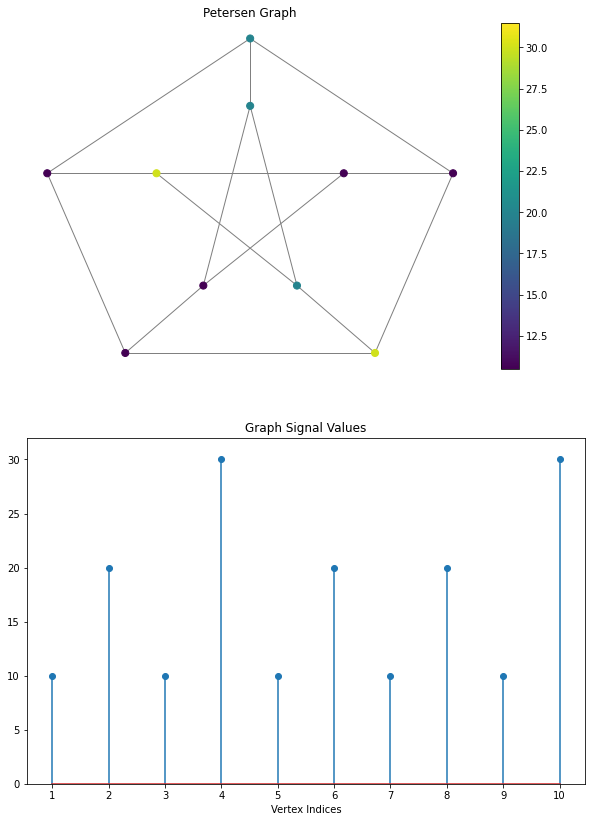

In [106]:
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
G2.set_coordinates(np.array([
    [-2.5,8],
    [4,14],
    [10.5,8],
    [8,0],
    [0,0],
    [4,11],
    [7,8],
    [5.5,3],
    [2.5,3],    
    [1,8],
]))
f = np.array([10,20,10,30,10,20,10,20,10,30])
G2.plot_signal(f, ax=axes[0], vertex_size=50)
_ = axes[0].set_title("Petersen Graph")
axes[0].set_axis_off()
axes[1].stem(np.arange(1, 11, 1), f)
axes[1].set_xticks(np.arange(1, 11, 1))
axes[1].set_ylim([0,32])
axes[1].set_xlabel("Vertex Indices")
axes[1].set_title("Graph Signal Values")
plt.savefig("GraphSP/fig/petersen_exp.png")
plt.show()

In [107]:
print("Check Weights Output: \n\t", G.check_weights(), '\n')
print("Connected Output: \n\t", G.is_connected(), '\n')
print("Directed Output: \n\t", G.is_directed())

Check Weights Output: 
	 {'has_inf_val': False, 'has_nan_value': False, 'is_not_square': False, 'diag_is_not_zero': False} 

Connected Output: 
	 True 

Directed Output: 
	 False


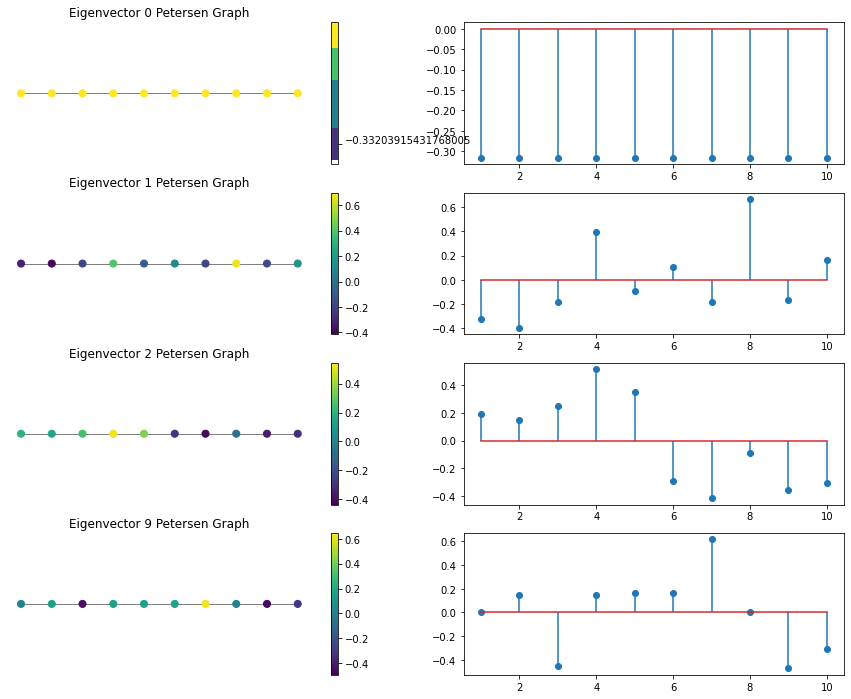

In [109]:
G.compute_fourier_basis()
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

eigenval_Nums = [0,1,2,9]

for i in range(4):            
    G.plot_signal(G.U[:,eigenval_Nums[i]], ax=axes[i,0], vertex_size=50)
    _ = axes[i,0].set_title("Eigenvector {} Petersen Graph".format(eigenval_Nums[i]))
    axes[i,0].set_axis_off()
    axes[i,1].stem(np.arange(1, 11, 1), G.U[:,eigenval_Nums[i]])
